In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
assets = ['TCS.BO','RELIANCE.BO','SBIN.BO','LT.BO','HINDUNILVR.BO']
start_date = '2014-01-01'
end_date = '2023-12-31'
portfolio_data = yf.download(assets, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [4]:
portfolio_data

Ticker,HINDUNILVR.BO,LT.BO,RELIANCE.BO,SBIN.BO,TCS.BO
Date,,,,,
2014-01-01,518.024902,657.243225,408.773895,142.588104,851.957275
2014-01-02,509.825989,637.259644,402.633301,140.746475,855.359253
2014-01-03,512.136292,622.410400,397.872620,138.614105,878.975525
2014-01-06,510.731995,621.826294,393.226959,136.316101,885.937500
2014-01-07,506.700470,626.591553,387.362366,134.062546,873.516235
...,...,...,...,...,...
2023-12-22,2550.255371,3449.189941,2564.699951,626.148438,3797.697266
2023-12-26,2560.802734,3461.989258,2577.500000,627.426941,3767.218750
2023-12-27,2584.075928,3515.965088,2586.350098,637.655396,3783.301758


DAILY RETURNS

In [5]:
def calculate_daily_returns(portfolio_data):
    return portfolio_data.pct_change()

In [7]:
daily_returns = calculate_daily_returns(portfolio_data)
daily_returns

Ticker,HINDUNILVR.BO,LT.BO,RELIANCE.BO,SBIN.BO,TCS.BO
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.015827,-0.030405,-0.015022,-0.012916,0.003993
2014-01-03,0.004532,-0.023302,-0.011824,-0.015150,0.027610
2014-01-06,-0.002742,-0.000938,-0.011676,-0.016578,0.007921
2014-01-07,-0.007894,0.007663,-0.014914,-0.016532,-0.014020
...,...,...,...,...,...
2023-12-22,0.008499,0.014934,0.000976,-0.011259,0.009461
2023-12-26,0.004136,0.003711,0.004991,0.002042,-0.008026
2023-12-27,0.009088,0.015591,0.003434,0.016302,0.004269


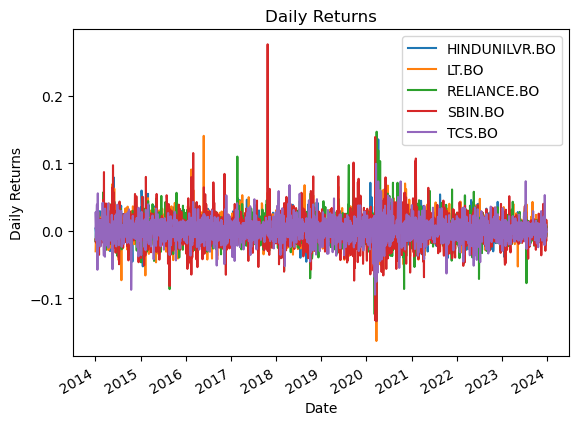

In [28]:
for assets in daily_returns.columns:
    daily_returns[assets].plot()
plt.title ('Daily Returns')
plt.xlabel ('Date')
plt.ylabel ('Daily Returns')
plt.legend()
plt.show()

CUMULATIVE RETURNS

In [17]:
def calculate_cumulative_returns(portfolio_data):
    return (1 + portfolio_data.pct_change()).cumprod()-1

In [20]:
cumulative_returns = calculate_cumulative_returns(portfolio_data)
cumulative_returns

Ticker,HINDUNILVR.BO,LT.BO,RELIANCE.BO,SBIN.BO,TCS.BO
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.015827,-0.030405,-0.015022,-0.012916,0.003993
2014-01-03,-0.011367,-0.052998,-0.026668,-0.027870,0.031713
2014-01-06,-0.014078,-0.053887,-0.038033,-0.043987,0.039885
2014-01-07,-0.021861,-0.046637,-0.052380,-0.059792,0.025305
...,...,...,...,...,...
2023-12-22,3.923036,4.247966,5.274129,3.391309,3.457615
2023-12-26,3.943397,4.267440,5.305442,3.400275,3.421840
2023-12-27,3.988324,4.349565,5.327092,3.472010,3.440718


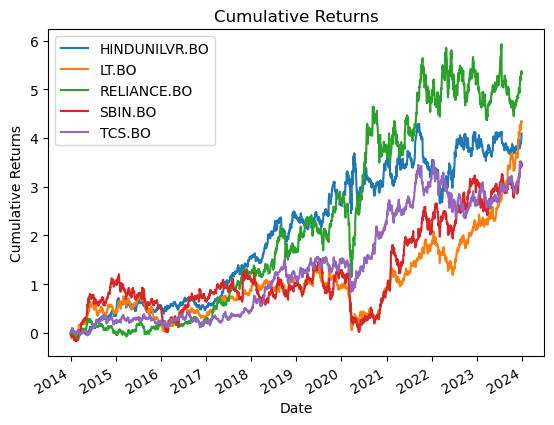

In [29]:
for assets in cumulative_returns.columns:
    cumulative_returns[assets].plot()
plt.title ('Cumulative Returns')
plt.xlabel ('Date')
plt.ylabel ('Cumulative Returns')
plt.legend()
plt.show()

MAXIMUM SHARPE RATIO PORTFOLIO

In [31]:
def maximum_sharpe_ratio_portfolio(returns):
    cov_matrix = returns.cov()
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    ones_vector = np.ones(len(returns.columns))
    weights = ones_vector/ones_vector.dot(inv_cov_matrix).dot(ones_vector)
    return returns.dot(weights)

In [33]:
max_sharpe_ratio_returns = maximum_sharpe_ratio_portfolio(daily_returns)
max_sharpe_ratio_returns

Date
2014-01-01             NaN
2014-01-02   -7.423722e-06
2014-01-03   -1.918391e-06
2014-01-06   -2.540403e-06
2014-01-07   -4.834049e-06
                  ...     
2023-12-22    2.391710e-06
2023-12-26    7.250350e-07
2023-12-27    5.150097e-06
2023-12-28    1.208186e-06
2023-12-29   -1.051414e-06
Length: 2444, dtype: float64

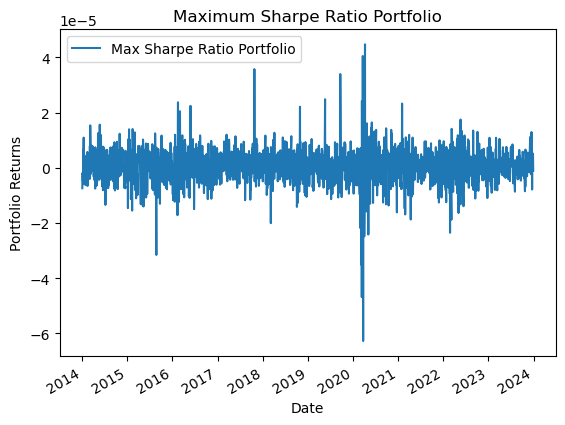

In [39]:
max_sharpe_ratio_returns.plot(label = 'Max Sharpe Ratio Portfolio')
plt.title ('Maximum Sharpe Ratio Portfolio')
plt.xlabel ('Date')
plt.ylabel ('Portfolio Returns')
plt.legend()
plt.show()

RISK PARITY PORTFOLIO

In [40]:
def risk_parity_portfolio(returns):
    inv_cov_matrix = np.linalg.inv(returns.cov())
    weights = inv_cov_matrix.dot(np.ones(len(returns.columns)))/len(returns.columns)
    return returns.dot(weights)

In [41]:
risk_parity_portfolio = risk_parity_portfolio(daily_returns)
risk_parity_portfolio

Date
2014-01-01          NaN
2014-01-02   -22.448693
2014-01-03     7.556868
2014-01-06    -2.034496
2014-01-07   -16.278723
                ...    
2023-12-22    14.755754
2023-12-26     0.684191
2023-12-27    15.809991
2023-12-28     4.924802
2023-12-29     4.092762
Length: 2444, dtype: float64

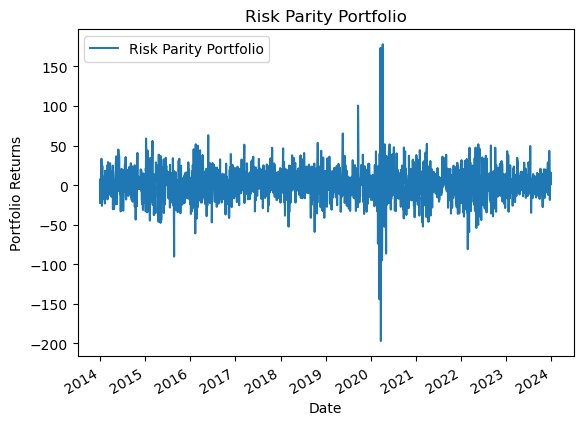

In [42]:
risk_parity_portfolio.plot(label = 'Risk Parity Portfolio')
plt.title ('Risk Parity Portfolio')
plt.xlabel ('Date')
plt.ylabel ('Portfolio Returns')
plt.legend()
plt.show()

INVERSE VOLATILITY WEIGHTED PORTFOLIO

In [49]:
def inverse_volatility_weighted_portfolio(returns):
    weights = 1/returns.std()
    weights /= weights.sum()
    return returns.dot(weights)

In [50]:
inverse_volatility_weighted_portfolio = inverse_volatility_weighted_portfolio(daily_returns)
inverse_volatility_weighted_portfolio

Date
2014-01-01         NaN
2014-01-02   -0.013714
2014-01-03   -0.002022
2014-01-06   -0.003881
2014-01-07   -0.008859
                ...   
2023-12-22    0.005473
2023-12-26    0.001200
2023-12-27    0.009359
2023-12-28    0.002330
2023-12-29   -0.000916
Length: 2444, dtype: float64

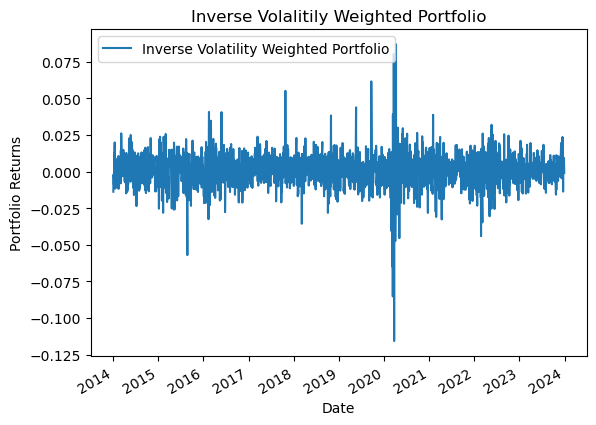

In [53]:
inverse_volatility_weighted_portfolio.plot(label = 'Inverse Volatility Weighted Portfolio')
plt.title ('Inverse Volalitily Weighted Portfolio')
plt.xlabel ('Date')
plt.ylabel ('Portfolio Returns')
plt.legend()
plt.show()